In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files

# UAS Sistem Cerdas
Dataset : Adult Data Set (https://www.kaggle.com/uciml/adult-census-income)

In [ ]:
# Untuk Membuka File Offline
# df = pd.read_csv("adult.csv");
# df
uploaded = files.upload()

Saving adult.csv to adult.csv


In [ ]:
df = pd.read_csv('adult.csv');
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Pra-Pemrosesan (Feature Reduction dan Removing Missing Values)

Sebelum melakukan proses klasifikasi, Kita akan melakukan Pra-Pemrosesan data terlebih dahulu yaitu Feature Reduction dan Removing Missing Values.

Untuk Dataset ini final weight, capital gain, dan capital loss akan dihapus karena yang akan di prediksi nanti adalah per-orangan saja

In [ ]:
df.drop('capital.gain' , inplace = True, axis =1)
df.drop('capital.loss' , inplace = True, axis =1)
df.drop('fnlwgt' , inplace = True, axis =1)
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


Selanjutnya kita akan menghapus missing value agar tidak mempengaruhi hasil akhir dari prediksi yang akan dilakukan oleh algoritma k-NN

In [ ]:
df = df.replace('?', np.nan)
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [ ]:
df = df.dropna()
df = df.reset_index()
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
1,3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
2,4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
3,5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
4,6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
30158,32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30159,32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30160,32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


## Learning
Data akan di bagi menjadi dua dengan ratio 0.8 sebagai data training dan 0.2 sebagai data validating

In [ ]:
le = preprocessing.LabelEncoder()

d = dict()
# Kolom Berikut : 
# workclass, education, marital.status,occupation,relationship,race, sex, 
# native.country,income

# Diubah akan di encode menjadi int untuk pelabelan, 
# karena proses KNeighborsClassifier() tidak dapat dilakukan pada String
df = df.drop('index', axis=1)
data = df
le.fit(df['workclass'])
df['workclass'] = le.transform(df['workclass'])
d['workclass'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['education'])
df['education'] = le.transform(df['education'])
d['education'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['marital.status'])
df['marital.status'] = le.transform(df['marital.status'])
d['marital.status'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['occupation'])
df['occupation'] = le.transform(df['occupation'])
d['occupation'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['relationship'])
df['relationship'] = le.transform(df['relationship'])
d['relationship'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['race'])
df['race'] = le.transform(df['race'])
d['race'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])
d['sex'] = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(df['native.country'])
df['native.country'] = le.transform(df['native.country'])
d['native.country'] = dict(zip(le.classes_, le.transform(le.classes_)))

# le.fit(df['income'])
# df['income'] = le.transform(df['income'])
# d['income'] = dict(zip(le.classes_, le.transform(le.classes_)))


In [ ]:

#set plot style
plt.style.use('ggplot')

def loadFile(path):
    #Load Excel File into Pandas DataFrame
    df = pd.read_excel(path)
    return df

def minorEDA(df):
    lineBreak = '------------------'

    #Check Ukuran
    print(lineBreak*3)
    print("Ukuran:")
    print(df.shape)
    print(lineBreak*3)
    #Check Nama Kolom
    print("Kolom :")
    print(df.columns)
    print(lineBreak*3)
    #Check tipe data, data missing , dan memory yang digunakan
    print("Data Types, Missing Data, Memory")
    print(df.info())
    print(lineBreak*3)

def feature(feature, df):
    # Memisahkan kolom income dengan kolom yang lainnya 
    y = df[feature]
    x = df.drop(feature, axis=1)
    return x, y

def TestTrainFitPlot(X, y):
    #Array untuk grafik akurasi training dengan
    neighbors = np.arange(1, 20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    # Membagi example untuk training dan untuk validasi sebanyak 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

    # Testing
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    #Akurasi 
    print('Default Accuracy: {}'.format(round(knn.score(X_test, y_test), 3)))
    #Looping untuk melihat akurasi semakin banyak neighbors
    for acc, n in enumerate(neighbors):

        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        train_accuracy[acc] = knn.score(X_train, y_train)
        test_accuracy[acc] = knn.score(X_test, y_test)

    #Plotting
    plt.title('KNN Neighbors')
    plt.xlabel('Neighbors\n(#)')
    plt.ylabel('Accuracy\n(%)', rotation=0, labelpad=35)
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')

    for a,b in zip(neighbors, test_accuracy):
        plt.text(a, b, str(round(b,2)))
        
    plt.legend()
    plt.show()

    
def Training(X,y,k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Training Accuracy : " + str(knn.score(X_train, y_train)))
    print("Testing Accuracy : " + str(knn.score(X_test, y_test)))
    return knn

    

------------------------------------------------------
Ukuran:
(30162, 12)
------------------------------------------------------
Kolom :
Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')
------------------------------------------------------
Data Types, Missing Data, Memory
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int64 
 2   education       30162 non-null  int64 
 3   education.num   30162 non-null  int64 
 4   marital.status  30162 non-null  int64 
 5   occupation      30162 non-null  int64 
 6   relationship    30162 non-null  int64 
 7   race            30162 non-null  int64 
 8   sex             3

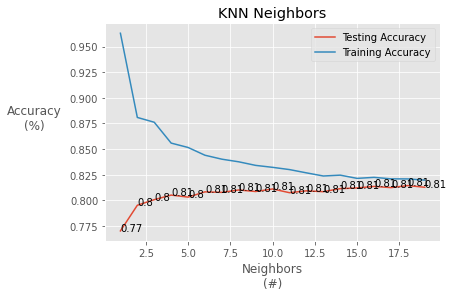

In [ ]:
minorEDA(df)
x, y = feature('income', df)
TestTrainFitPlot(x, y)

In [ ]:
# Menggunakan Hardcoded deklarasi variable

# age = 40
# workclass = d['workclass']['Private']
# education =  d['education']['HS-grad']
# education_num = 9
# marital_status = d['marital.status']['Married-civ-spouse']
# occupation= d['occupation']['Sales']
# relationship =  d['relationship']['Husband']
# race =  d['race']['White']
# sex = d['sex']['Male']
# hours_per_week = 40
# native_country = d['native.country']['United-States']

#40	Private	HS-grad	9	Married-civ-spouse	Machine-op-inspct	Husband	White	Male	40	United-States	>50K


# menggunkana input native puthon

# age =input("Enter age: ")
# workclass = d['workclass'][input("Enter Workclass:")]
# education =  d['education'][input("Enter education:")]
# education_num = input("Enter education.num:")
# marital_status = d['marital.status'][input("Enter marital.status:")]
# occupation= d['occupation'][input("Enter occupation:")]
# relationship =  d['relationship'][input("Enter relationship:")]
# race =  d['race'][input("Enter race:")]
# sex = d['sex'][input("Enter sex:")]
# hours_per_week = input("Enter hours.per.week:")
# native_country = d['native.country'][input("Enter native.country:")]



In [ ]:
#@title Prediksi
#@markdown Forms support many types of fields.

age = 40  #@param {type: "slider", min: 17, max: 90}
workclass = "Private"  #@param ['Private', 'Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
education = "HS-grad"  #@param ['Some-college','HS-grad','Bachelors','Masters','Assoc-voc','11th','Assoc-acdm','10th','7th-8th','Prof-school','9th','Doctorate','12th','5th-6th','1st-4th']
education_num = 9  #@param {type: "slider", min: 1, max: 16}
marital_status = "Never-married"  #@param ['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse']
occupation = "Sales"  #@param ['Craft-repair','Prof-specialty','Exec-managerial','Adm-clerical','Sales','Other-service','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv']
relationship = "Husband"  #@param ['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative']
race = "White"  #@param ['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other']
sex =  "Male"  #@param ['Male','Female']
hours_per_week = 40  #@param {type: "slider", min: 1, max: 99}
native_country = "United-States"  #@param ['United-States','Mexico','Philippines','Puerto-Rico','Canada','Germany','El-Salvador','Cuba','India','South','England','Jamaica','China','Italy','Dominican-Republic','Guatemala','Japan','Poland','Vietnam','Columbia','Taiwan','Iran','Haiti','Portugal','Nicaragua','France','Peru','Ecuador','Greece','Ireland','Cambodia','Hong','Trinadad&Tobago','Thailand','Honduras','Yugoslavia','Laos','Hungary','Outlying-US(Guam-USVI-etc)','Scotland','Holand-Netherlands']
k = 15  #@param {type: "number"}


workclass = d['workclass'][workclass]
education =  d['education'][education]
marital_status = d['marital.status'][marital_status]
occupation= d['occupation'][occupation]
relationship =  d['relationship'][relationship]
race =  d['race'][race]
sex = d['sex'][sex]
native_country = d['native.country'][native_country]

In [ ]:
#array berisikan data untuk melakukan prediksi
a=np.array([[age,workclass,education,education_num ,
            marital_status ,occupation,relationship,race,sex,hours_per_week,native_country]])

knn = Training(x,y,k)
a = a.astype(np.float64)
result = knn.predict(a)
prob = knn.predict_proba(a)
print('Hasil Perdiksi : ')
print (result)
print('Probablitas <=50k: ')
print (prob[0][0])
print('Probablitas >50k: ')
print (prob[0][1])

Training Accuracy : 0.8213767665464793
Testing Accuracy : 0.8120338140228742
Hasil Perdiksi : 
['<=50K']
Probablitas <=50k: 
0.6666666666666666
Probablitas >50k: 
0.3333333333333333
